<a href="https://colab.research.google.com/github/eve-okorie16/sync-ml/blob/main/sign_language_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**sign langauage classification using computer vision **
the dataset used was the mnist sign language dataset gotten from kaggle.it shows the american sign for the alphabet letters excluding j and z because they require motion.

In [18]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#get training and test data sets
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

In [20]:
#view our dataset
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [23]:
#create labels for the training set
labels = train['label'].values
#view the  labels and convert to array
Unique_val = np.array(labels)
np.unique(Unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<Axes: ylabel='count'>

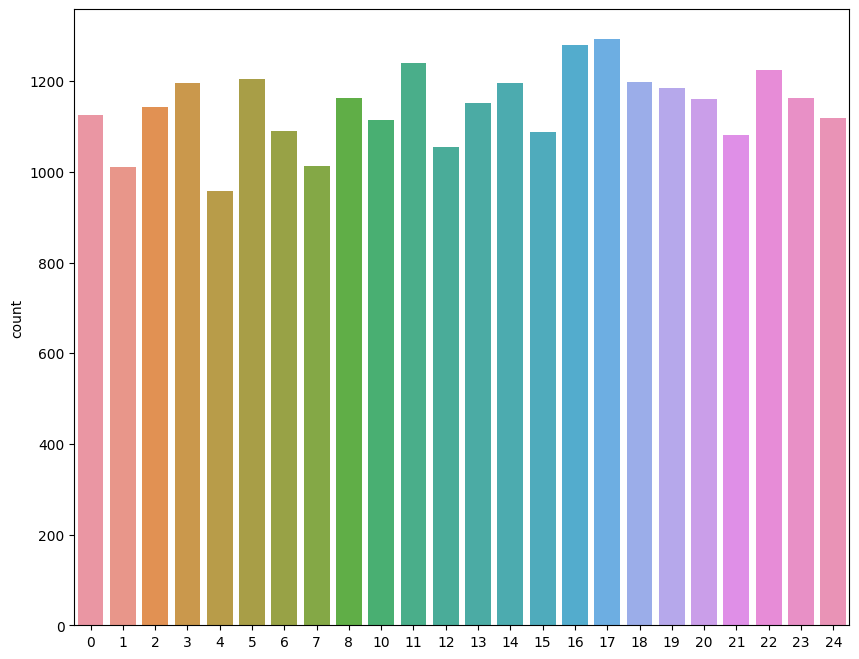

In [24]:
plt.figure(figsize = (10, 8))
sns.countplot(x =labels)

In [25]:
#drop training labels from training data
train.drop('label', axis = 1, inplace=True)

In [26]:
#extract image from each row in our csv
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [27]:
#using one hot encoding to preprocess
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


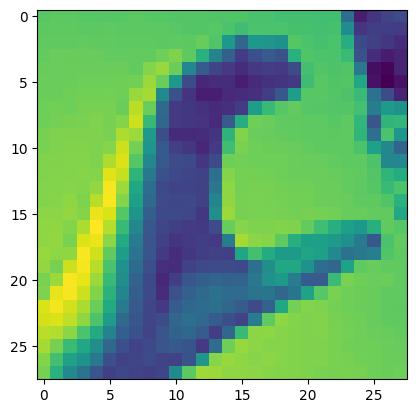

In [28]:
#inspect the image
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

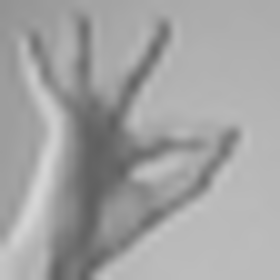

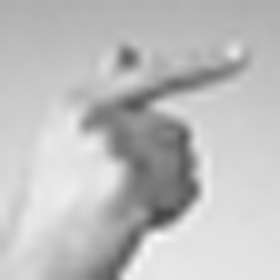

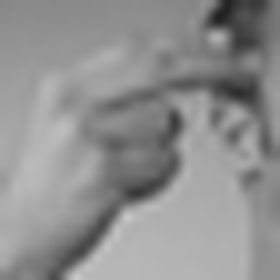

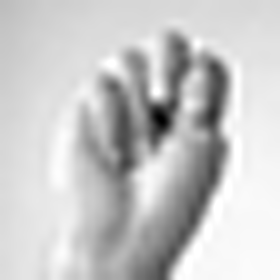

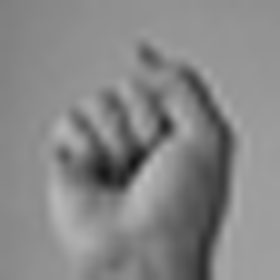

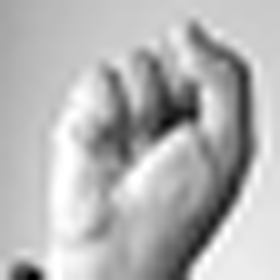

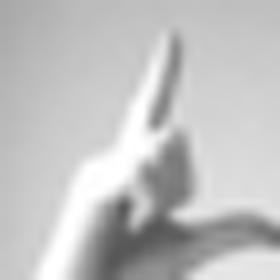

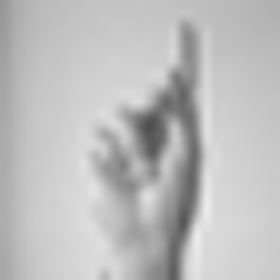

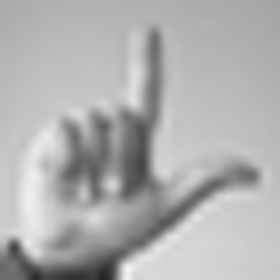

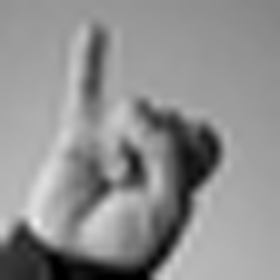

In [29]:
#use opencv to view 10 random images from our training data
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

for i in range (0,10):
  rand = np.random.randint(0, len(images))
  input_im = images[rand]

  sample = input_im.reshape(28,28).astype(np.uint8)
  sample = cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
  cv2_imshow(sample)
  cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
#split data into X, Y train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.3, random_state =100)

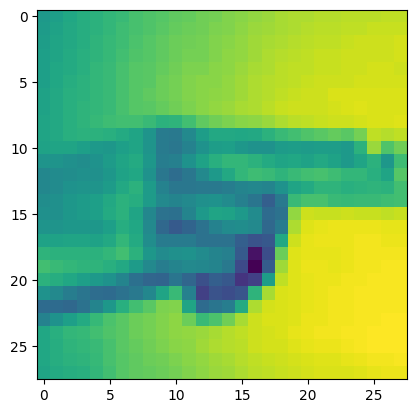

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Batch_size = 128
num_classes = 24
epochs = 15
#sccale images
X_train = X_train / 255
X_test = X_test / 255

#reshape for neural network
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
plt.imshow(X_train[0].reshape(28,28))



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 64)        

model saved


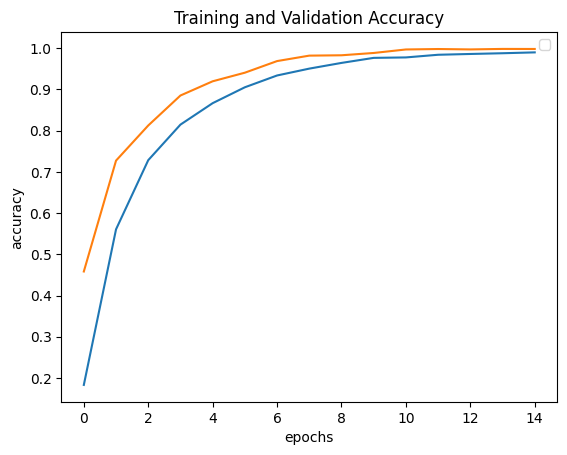

In [32]:
#create CNN model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

model = Sequential()
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', input_shape=(28, 28, 1) ))
model.add(MaxPooling2D(pool_size = (2, 2) ))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2) ))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2) ))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

#compile model
model.compile(loss = 'categorical_crossentropy', optimizer= Adam(), metrics=['accuracy'])
print(model.summary())

#train model
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=epochs, batch_size = Batch_size)

model.save("sign_mnist_model.h5")
print("model saved")

#view history graphically
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc)
plt.plot(val_acc)
plt.title("Training and Validation Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()



In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
model = load_model('sign_mnist_model.h5')

prediction = model.predict(X_test)

prediction = np.argmax(prediction, axis=1)
Y_test = np.argmax(Y_test, axis=1)
cm = confusion_matrix(Y_test, prediction)
print(cm)

258/258 [==============================] - 3s 10ms/step
[[331   0   0   0   0   0   0   1   0   0   0   0   2   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 319   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 347   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 347   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   1   0]
 [  0   0   0   0 292   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   1   0   0 357   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 327   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 305   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 356   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

<Axes: >

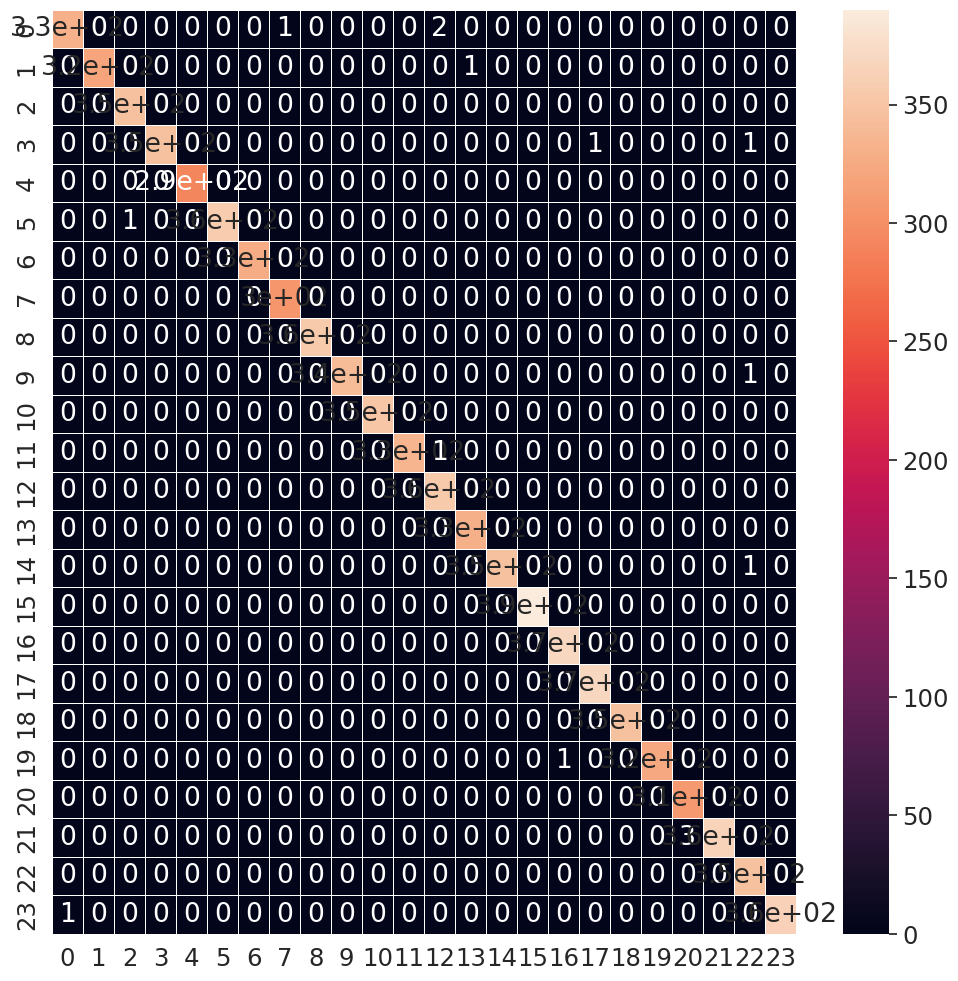

In [77]:
#view the confusion matrix using a heatmap
fig, ax = plt.subplots(figsize=(12, 12))
sns.set(font_scale= 1.6)
sns.heatmap(cm, annot=True,linewidths= .5, ax=ax)

In [59]:
#create function to match label to letters
def getletter(result):
    class_names = {0: 'A',
                   1: 'B',
                   2: 'C',
                   3: 'D',
                   4: 'E',
                   5: 'F',
                   6: 'G',
                   7: 'H',
                   8: 'I',
                   9: 'K',
                   10: 'L',
                   11: 'M',
                   12: 'N',
                   13: 'O',
                   14: 'P',
                   15: 'Q',
                   16: 'R',
                   17: 'S',
                   18: 'T',
                   19: 'U',
                   20: 'v',
                   21: 'w',
                   22: 'X',
                   23: 'Y'}
    try:
      res = int(result)
      return class_names
    except:
      return "error"

predicted Label:  0
True Label:  0


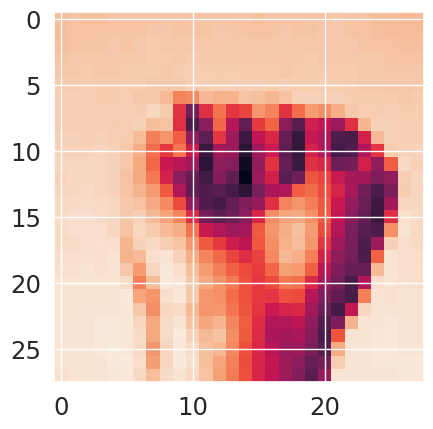

In [79]:
i = random.randint(1, len(prediction))
plt.imshow(X_test[i,:,:,0])
print("predicted Label: ", prediction[i])
print("True Label: ", Y_test[i])